# Lab#7
Noam Yan

<br><br>
I choose high-pt data ranging from 1000 to 1200.
## 1.

In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats

In [2]:
higgs_df = pd.read_pickle("higgs.pkl")
qcd_df = pd.read_pickle("qcd.pkl")

In [3]:
# cols = higgs_df.columns.values
# cols

In [4]:
# min_max_scaler = preprocessing.MinMaxScaler()
# higgs_scaled = min_max_scaler.fit_transform(higgs_df)*50
# qcd_scaled = min_max_scaler.fit_transform(qcd_df)*100

In [5]:
# higgs_scaled.shape

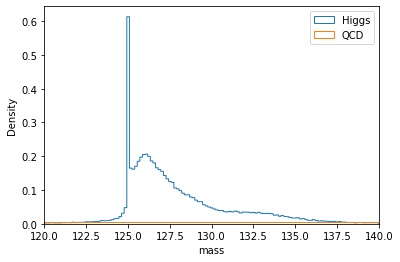

In [6]:
plt.hist(higgs_df['mass'],'auto',density=True,histtype='step',label="Higgs")
plt.hist(qcd_df['mass'],'auto',density=True,histtype='step', label='QCD')
plt.legend()
plt.xlabel('mass')
plt.ylabel('Density')
plt.xlim([120,140])
plt.show()

In [7]:
N_higgs = 50
N_QCD  = 2000

significance = stats.norm.isf(stats.poisson.sf(N_higgs+N_QCD, mu = 2000))
print("The significance is %.2f. N_Higgs/(√N_QCD) is %.2f" %(significance, N_higgs/np.sqrt(N_QCD)))

The significance is 1.13. N_Higgs/(√N_QCD) is 1.12


This is how we calculate the standard deviation, so they are expected to be equivalent.<br><br>
## 2. 
From the distribution of mass, we know that QCD is uniformly distributed. To opmitmize the expected significance, we need to find the peak of higgs data.

In [8]:
hist, bins = np.histogram(higgs_df['mass'],'auto',density=True)
lowerbound = bins[np.where(hist==hist.max())]
upperbound = bins[np.where(hist==hist.max())[0]+1]
print("The range is (%.3f, %.3f)" %(lowerbound,upperbound))

The range is (124.934, 125.091)


In [9]:
N_higgs = higgs_df[(higgs_df['mass'] > lowerbound[0]) & (higgs_df['mass'] < upperbound[0])].shape[0]
N_qcd = qcd_df[(qcd_df['mass'] > lowerbound[0]) & (qcd_df['mass'] < upperbound[0])].shape[0]
# Normalization
N_higgs = N_higgs * 50 / higgs_df.shape[0]
N_qcd = N_qcd * 2000 / qcd_df.shape[0]

In [10]:
significance = N_higgs / np.sqrt(N_qcd)
significance

3.52939182545785

## 3. 
### SET A

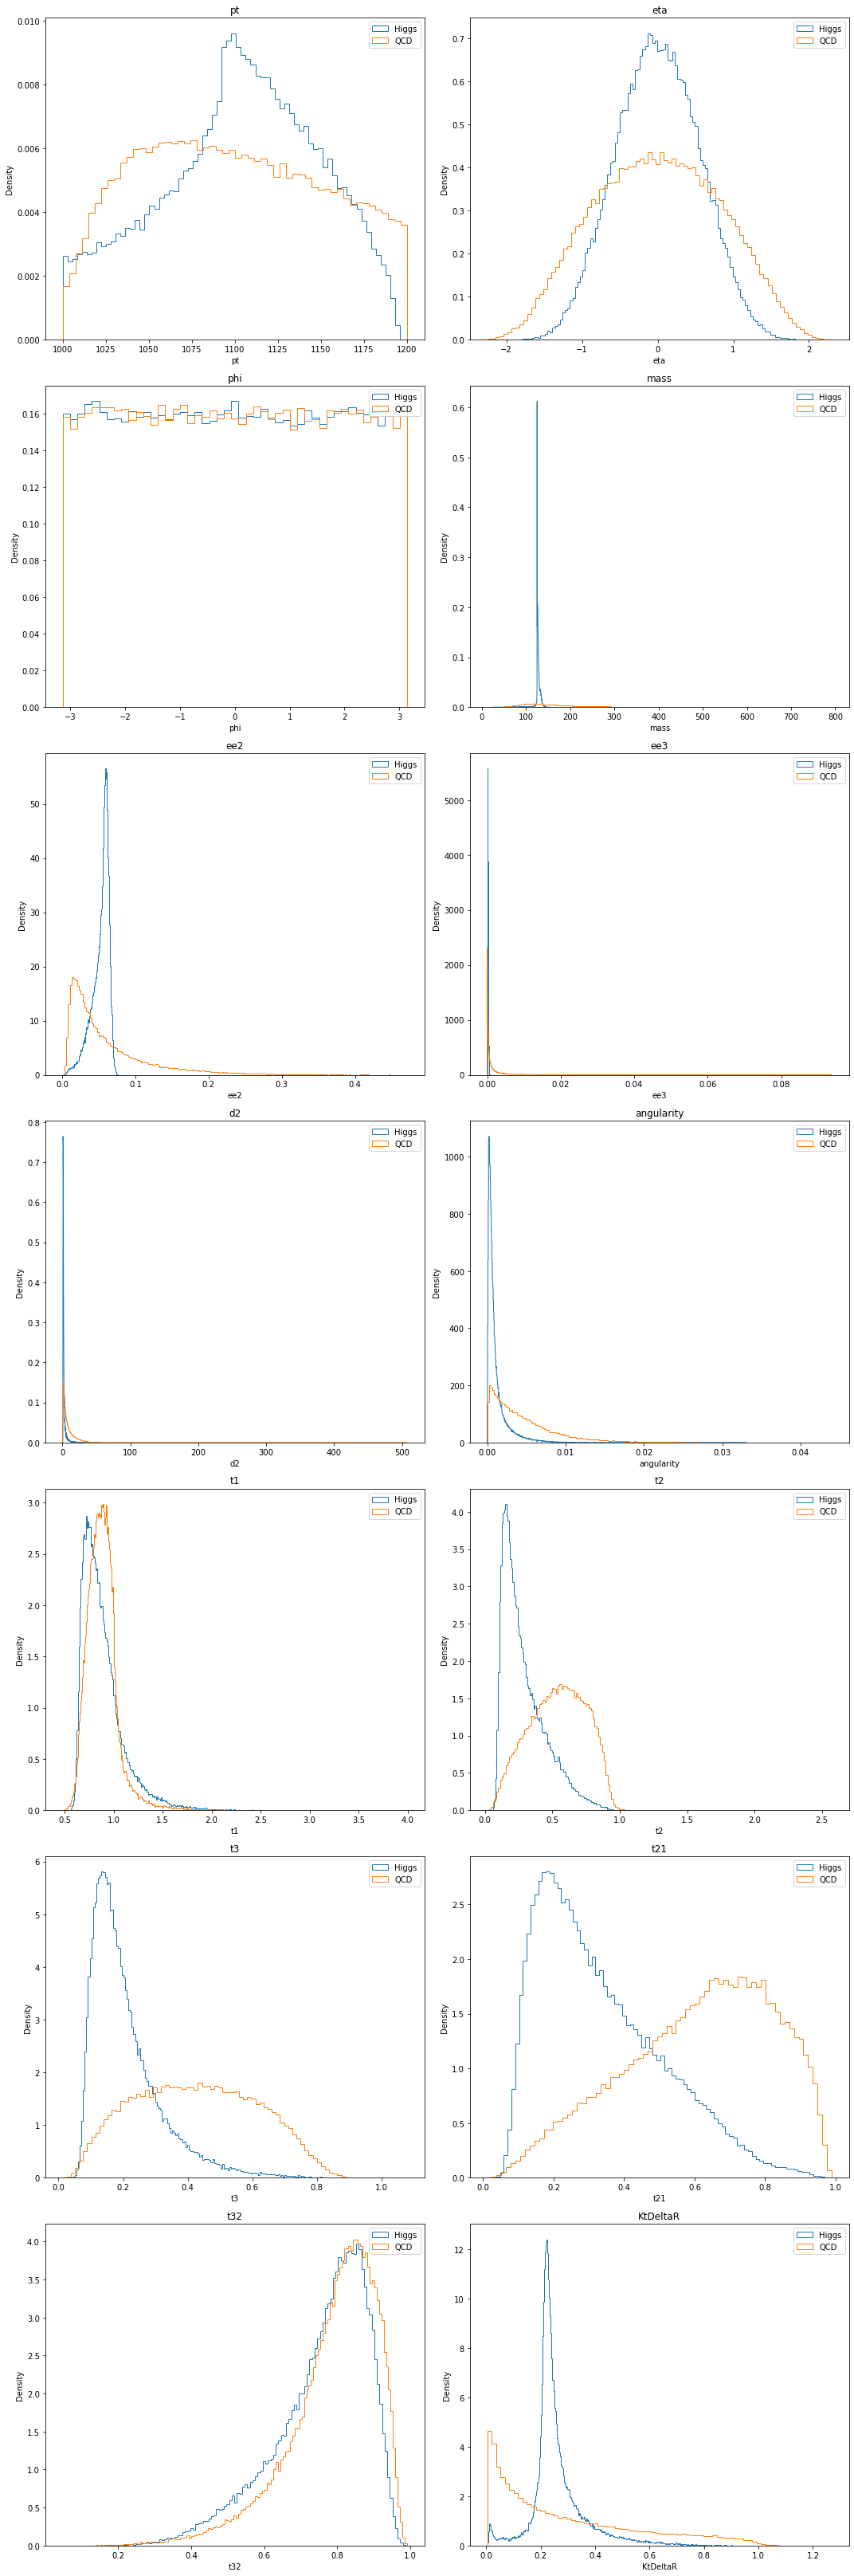

In [11]:
cols = higgs_df.columns.values
plt.rcParams["figure.figsize"] = (15,45)
fig,ax = plt.subplots(cols.shape[0]//2, 2)
for i, col in enumerate(cols):
    ax[i//2,i%2].hist(higgs_df[col],'auto',density=True,histtype='step',label="Higgs")
    ax[i//2,i%2].hist(qcd_df[col],'auto',density=True,histtype='step', label='QCD')
    ax[i//2,i%2].legend()
    ax[i//2,i%2].set_xlabel(col)
    ax[i//2,i%2].set_ylabel('Density')
    ax[i//2,i%2].title.set_text(col)
plt.tight_layout()
plt.show()

The plots above shows the distribution of each feature. Through comparison between two datasets, we can have a rough understanding about which feature can help us distinguish them. The more disparate are those two distribution, the easier we can discriminate by such feature.<br> <br>
I'd like to choose t21 and t3 as discriminative features.

In [12]:
def sig_disc (feature, higgs_df, qcd_df, returnSig=True):
    hist, bins = np.histogram(higgs_df[feature],'auto',density=True)
    lowerbound = bins[np.where(hist==hist.max())]
    upperbound = bins[np.where(hist==hist.max())[0]+1]
    N_higgs = higgs_df[(higgs_df[feature] > lowerbound[0]) & (higgs_df[feature] < upperbound[0])].shape[0]
    N_qcd = qcd_df[(qcd_df[feature] > lowerbound[0]) & (qcd_df[feature] < upperbound[0])].shape[0]
    # Normalization
    N_higgs_n = N_higgs * 50 / higgs_df.shape[0]
    N_qcd_n = N_qcd * 2000 / qcd_df.shape[0]
    significance = N_higgs_n / np.sqrt(N_qcd_n)
    if returnSig:
        return significance
    return N_higgs, N_qcd
def sig_cal(N_higgs,N_qcd):
    N_higgs_n = N_higgs * 50 / 100000
    N_qcd_n = N_qcd * 2000 / 100000

    return N_higgs_n / np.sqrt(N_qcd_n)

In [13]:
sig_t21 = sig_disc("t21",higgs_df,qcd_df)
sig_t3 = sig_disc("t3",higgs_df,qcd_df)
print("The optimized significance of t21 is %.2f." %sig_t21)
print("The optimized significance of t3 is %.2f." %sig_t3)

The optimized significance of t21 is 0.49.
The optimized significance of t3 is 0.47.


### SET B

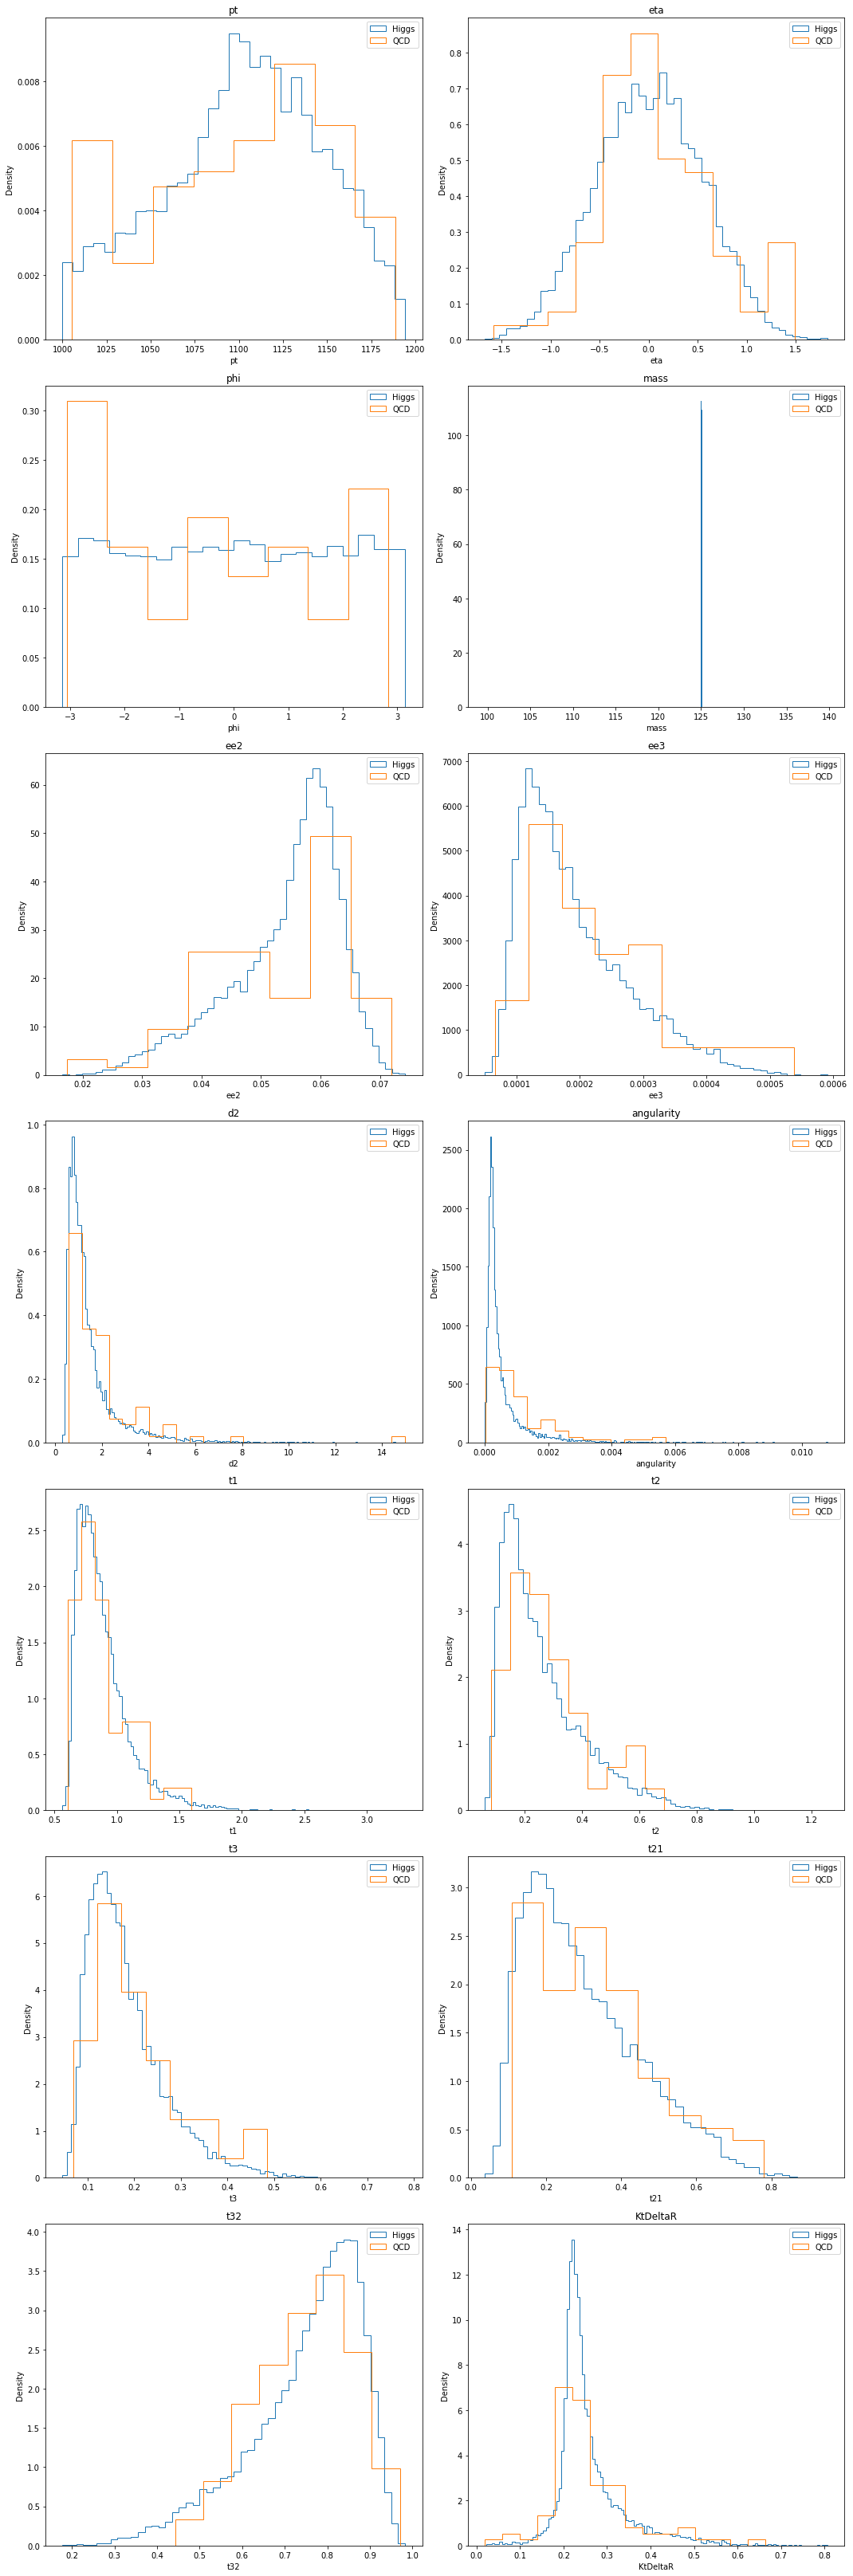

In [14]:
higgs_cutted = higgs_df[(higgs_df['mass'] > lowerbound[0]) & (higgs_df['mass'] < upperbound[0])]
qcd_cutted = higgs_df[(qcd_df['mass'] > lowerbound[0]) & (qcd_df['mass'] < upperbound[0])]

cols = higgs_cutted.columns.values
plt.rcParams["figure.figsize"] = (15,45)
fig,ax = plt.subplots(cols.shape[0]//2, 2)
for i, col in enumerate(cols):
    ax[i//2,i%2].hist(higgs_cutted[col],'auto',density=True,histtype='step',label="Higgs")
    ax[i//2,i%2].hist(qcd_cutted[col],'auto',density=True,histtype='step', label='QCD')
    ax[i//2,i%2].legend()
    ax[i//2,i%2].set_xlabel(col)
    ax[i//2,i%2].set_ylabel('Density')
    ax[i//2,i%2].title.set_text(col)
plt.tight_layout()
plt.show()

According to the plots, "mass" works pretty well. To improve the performance, I will choose "angularity" for further classification 

In [15]:
hist, bins = np.histogram(higgs_cutted['angularity'],'auto',density=True)
lowerbound_a = bins[np.where(hist==hist.max())]
upperbound_a = bins[np.where(hist==hist.max())[0]+1]
higgs_cond = (higgs_df['mass'] > lowerbound[0]) & (higgs_df['mass'] < upperbound[0]) & (higgs_df['angularity'] > lowerbound_a[0]) & (higgs_df['angularity'] < upperbound_a[0])
qcd_cond = (qcd_df['mass'] > lowerbound[0]) & (qcd_df['mass'] < upperbound[0]) & (qcd_df['angularity'] > lowerbound_a[0]) & (qcd_df['angularity'] < upperbound_a[0])
N_higgs = higgs_df[higgs_cond].shape[0]
N_qcd = higgs_df[qcd_cond].shape[0]
# Normalization
N_higgs = N_higgs * 50 / higgs_df.shape[0]
N_qcd = N_qcd * 2000 / qcd_df.shape[0]
significance_2cond = N_higgs / np.sqrt(N_qcd)

print("With two conditions, mass and angularity, the expected significance is %.3f.\nWith only one condition, mass, the expected significance is %.3f." %(significance_2cond,significance))

With two conditions, mass and angularity, the expected significance is 3.635.
With only one condition, mass, the expected significance is 3.529.


In [16]:
Nh, Nq = sig_disc('angularity',higgs_cutted, qcd_cutted,False)

In [17]:
sig_cal(Nh,Nq)

1.625410717326547

5.736074421445385

In [19]:
upperbound

array([125.09053482])

In [20]:
higgs_cutted['angularity']

8        0.000169
13       0.000175
24       0.000238
43       0.000212
73       0.000497
           ...   
99914    0.000296
99953    0.000137
99964    0.000804
99971    0.000190
99988    0.000905
Name: angularity, Length: 9575, dtype: float64